In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

In [2]:
df = pd.read_csv('res_df.csv', index_col='client_id')

In [3]:
df = df.drop(df.columns[0], axis=1)

In [4]:
df.head()

,order_freq,item_sum,items_group_code,days_ago
client_id,,,,
11219,7,6259.44,0,20
13029,1,7517.40,0,26
13029,23,9748.80,1,26
13042,1,1520.00,2,49
13042,10,18220.71,0,49


In [5]:
scaler = StandardScaler()

In [6]:
df_scaled = scaler.fit_transform(df)

/home/ssv/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/ssv/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [7]:
df_scaled

array([[-0.12431058, -0.32079981, -0.79398578, -1.16947086],
       [-0.37674676, -0.29859025, -0.79398578, -0.71099209],
       [ 0.54885255, -0.25919439, -0.15062993, -0.71099209],
       ...,
       [-0.37674676,  0.05932695, -0.79398578, -1.47512337],
       [-0.37674676, -0.37382267, -0.79398578, -1.47512337],
       [-0.37674676, -0.40065154, -0.79398578, -1.47512337]])

In [8]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

In [9]:
df_scaled_tsne = tsne.fit_transform(df_scaled)

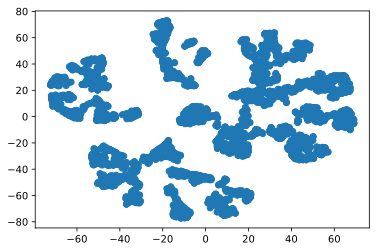

In [10]:
plt.scatter(df_scaled_tsne[:, 0], df_scaled_tsne[:, 1]);

In [11]:
num_clasters = 5

In [12]:
kmeans = KMeans(n_clusters=num_clasters, max_iter=100, random_state=42).fit(df_scaled_tsne)

In [13]:
labels = kmeans.fit_predict(df_scaled_tsne)

In [14]:
pd.value_counts(labels)

1    1169
2    1144
3     875
0     686
4     427
dtype: int64

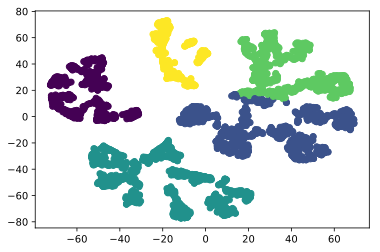

In [15]:
plt.scatter(df_scaled_tsne[:, 0], df_scaled_tsne[:, 1], c=labels);

In [16]:
tsne = TSNE(n_components=3, learning_rate=250, random_state=42)
df_scaled_tsne = tsne.fit_transform(df_scaled)

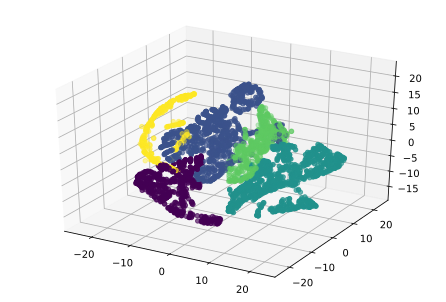

In [17]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter3D(df_scaled_tsne[:, 0], df_scaled_tsne[:, 1],
             df_scaled_tsne[:, 2], c=labels, marker='o');

In [18]:
df['class'] = 0
for a in range(num_clasters):
    df['class'][labels == a] = a


/home/ssv/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [19]:
df.head()

,order_freq,item_sum,items_group_code,days_ago,class
client_id,,,,,
11219,7,6259.44,0,20,3
13029,1,7517.40,0,26,3
13029,23,9748.80,1,26,2
13042,1,1520.00,2,49,2
13042,10,18220.71,0,49,1


In [20]:
df.groupby('class').agg({'order_freq':['min', 'max', 'mean'],
                        'item_sum':['min', 'max', 'mean'],
                        'items_group_code':'unique',
                        'days_ago':['min', 'max', 'mean']
                        })

order_freq                 item_sum                            \
             min  max       mean      min         max          mean   
class                                                                 
0              1   43   4.626822      0.0   236000.00  26655.960934   
1              1  217   8.310522      0.0  1791476.00  32287.516604   
2              1  892  19.607517     72.0   349507.75  11535.306286   
3              1   43   7.648000      0.0   411426.53  35736.433098   
4              1   19   1.880562      0.0   101647.00  10717.203584   

      items_group_code days_ago                 
                unique      min max       mean  
class                                           
0            [3, 4, 2]       16  63  35.166181  
1            [0, 3, 1]       16  63  44.542344  
2               [1, 2]       16  63  35.284965  
3                  [0]       16  49  23.621714  
4         [4, 5, 6, 7]       16  63  34.229508

In [21]:
dict_groups = {'одежные ткани': 0,
 'швейная фурнитура': 1,
 'готовые изделия': 2,
 'ткани для дома': 3,
 'технические ткани': 4,
 'выкройки online': 5,
 'мебельные ткани': 6,
 'швейное оборудование': 7}